In [1]:
import pandas as pd
import numpy as np
from torch import tensor

In [2]:
def f(xy):
    x = xy[0] - 3
    y = xy[1] - 10
    return x**2 + y**2 + x*y

xy = tensor([0.0, 0.0]).requires_grad_()
xy_history = []

learning_rate = 0.1
for i in range(100):
    xy_history.append(xy.detach().numpy().copy())
    z = f(xy)
    z.backward() # compute the gradients
    xy.data -= xy.grad * learning_rate
    xy.grad.zero_()

history = pd.DataFrame(xy_history, columns=["x", "y"])
history.head()

,x,y
0,0.0000,0.000
1,1.6000,2.300
2,2.6500,3.980
3,3.3220,5.219
4,3.7357,6.143


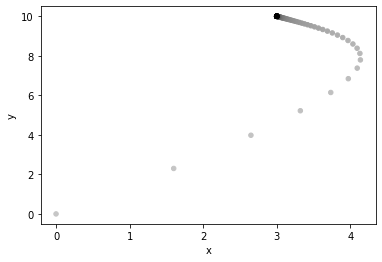

In [3]:
history.plot.scatter(x="x", y="y", c=history.index, vmin=-50)

# Example: Regression

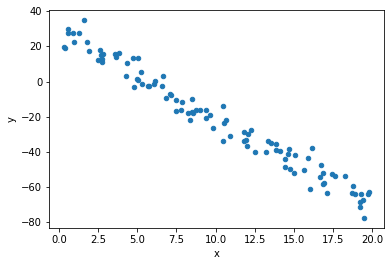

In [4]:
df = pd.DataFrame({"x": np.random.uniform(0, 20, size=100)})
df["y"] = -5 * df["x"] + 30 + np.random.normal(size=len(df), scale=5)
df.plot.scatter(x="x", y="y")

In [5]:
x = tensor(df["x"].values)
y = tensor(df["y"].values)

In [6]:
def mean_square_error(ab):
    slope = ab[0]
    intercept = ab[1]
    ypred = x * slope + intercept

    return ((ypred - y) ** 2).mean()

mean_square_error(tensor([-5, 30]))

tensor(27.0840, dtype=torch.float64)

In [7]:
ab = tensor([0.0, 0.0]).requires_grad_()
ab_history = []

learning_rate = 0.002
for i in range(5000):
    ab_history.append(ab.detach().numpy().copy())
    err = mean_square_error(ab)
    err.backward() # compute the gradients
    ab.data -= ab.grad * learning_rate
    ab.grad.zero_()

history = pd.DataFrame(ab_history, columns=["slope", "intercept"])
history.tail()

,slope,intercept
4995,-4.903865,28.013868
4996,-4.903880,28.014059
4997,-4.903894,28.014250
4998,-4.903908,28.014441
4999,-4.903923,28.014631


In [8]:
slope, intercept = ab.data.numpy()
slope, intercept

(-4.903937, 28.014822)

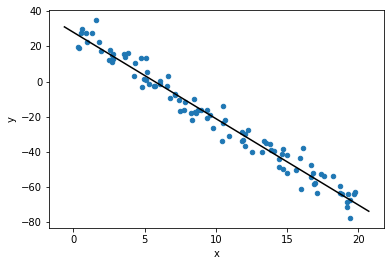

In [9]:
ax = df.plot.scatter(x="x", y="y")
x0 = ax.get_xlim()[0]
x1 = ax.get_xlim()[1]
y0 = x0 * slope + intercept
y1 = x1 * slope + intercept
ax.plot([x0, x1], [y0, y1], "k")